Verificando a incidência das variáveis capital social; capital político, parentesco, todas dicotômicas, e financiamento de campanha (contínua) sobre o percentual de votos (contínua) de uma mulher candidata a um assento na Alepe (assembléia Legislativa de Pernambuco). Os dados são oriundos de um projeto de pesquisa de mestrado em políticas públicas da UFPE.

Dados primários coletado pela autora no site do TSE (eleições 2018 - candidatas a deputadas estadual em PE). 
O método científico é o alicerce da referida análise, dessa forma, apresentamos como problema de pesquisa: 
o capital social e político, o parentesco e o financiamento de campanha são capazes de aumentar o percentual de votos de mulheres candidatas a deputada estadual? 
Tendo como prováveis as seguintes hipóteses a serem testadas:

H1 - o capital social aumenta o percentual de votos; H2 – o capital político aumenta o percentual de votos; H3 – o parentesco aumenta o percentual de votos; 
H4 – o financiamento de campanha aumenta o percentual de votos. 
A operacionalização das hipóteses se dará pela correlação entre as variáveis, ou seja, "quando uma mudança no valor de uma variável é associada a uma mudança na outra variável" (FLICK, 2009, 144).

In [1]:
import pandas as pd
from scipy.stats import spearmanr, pearsonr
import statsmodels.formula.api as smf

Acima, Importação das possíveis bibliotecas que serão convidadas a nos ajudar

In [3]:
df_2018 = pd.read_excel(r'C:\Users\alexc\OneDrive\Curso_Python\Reprograma_On33\Projeto_final\Projeto_Final.ipynb\DataSet_excel_2018.xlsx')

Importação, leitura e visualização do df

In [5]:
print(df_2018.head())

               Nome Urna  Capital_Social  Parentesco  Financiamento_Campanha  \
0  PASTORA ADRIANA COSTA               1           0                  6200.0   
1             CABO AENIA               0           0                 40250.0   
2          AILZA TRAJANO               1           0                  2350.0   
3         ALCIONE GUEDES               0           0                     0.0   
4      ALEKSANDRA SERBIM               1           0                     0.0   

   Capital_Politico  Percentual_Votos  
0               0.0              0.00  
1               0.0              0.00  
2               0.0              0.01  
3               0.0              0.00  
4               0.0              0.02  


Como estamos trabalhando com variáveis dummy, é preciso ter muuito cuidado com a "limpeza". Aqui o zero tem muito valor.

In [4]:
df_2018.isnull().sum()

Nome Urna                 0
Capital_Social            0
Parentesco                0
Financiamento_Campanha    0
Capital_Politico          1
Percentual_Votos          0
dtype: int64

Apresentando as nossas variáveis

In [5]:
variaveis = pd.DataFrame({
    'Capital_Social': df_2018['Capital_Social'],
    'Parentesco': df_2018['Parentesco'],
    'Financiamento_Campanha': df_2018['Financiamento_Campanha'],
    'Capital_Politico': df_2018['Capital_Politico'],
    'Percentual_Votos': df_2018['Percentual_Votos']
})

Se liga no processo de correlação: 

Correlação das variáveis X com a variável Y - verificação de direção e magnitude da relação. Importante: Em uma correlação, os valores na matriz de correlação variam de -1 a 1. Valores próximos de 1 indicam uma forte correlação positiva (quando uma variável aumenta, a outra também tende a aumentar). Valores próximos de -1 indicam uma forte correlação negativa (quando uma variável aumenta, a outra tende a diminuir). Valores próximos de 0 indicam uma correlação fraca ou inexistente.

In [6]:
# Aqui, foi utilizada a correlação de  Spearman, tendo em vista ser mais apropriada para correlacionar variáveis dummy (dicotômicas).
# Pensa em uma matriz, agora, vamos selecionar as colunas das variáveis X
variaveis_x = variaveis[['Capital_Social', 'Parentesco', 'Financiamento_Campanha', 'Capital_Politico']]

# Para calcular essa correlação do tipo Spearman entre as variáveis X e Y, vamos convidar o método corrwith do Pandas Dataframe .
correlacao_spearman_xy = variaveis_x.corrwith(variaveis['Percentual_Votos'], method='spearman')

print(correlacao_spearman_xy)

Capital_Social            0.591495
Parentesco                0.503815
Financiamento_Campanha    0.639330
Capital_Politico          0.324418
dtype: float64


Se liga nos coeficientes de correlação: Estão nos dizendo que a correlação entre a variável "Financiamento_Campanha e o Percentual_votos tem maior magnitude (força), seguida por Capital_Social e Parentesco.

Em resumo:

O Financiamento_Campanha permanece como a variável com maior impacto no Percentual_Votos, seguido por Capital_Social e Parentesco. Capital_Politico ainda apresenta uma influência, mas menor em comparação com as outras variáveis. Todas as variáveis demonstram uma correlação positiva com Percentual_Votos, indicando que maiores valores nessas variáveis tendem a estar associados a um maior percentual de votos. 

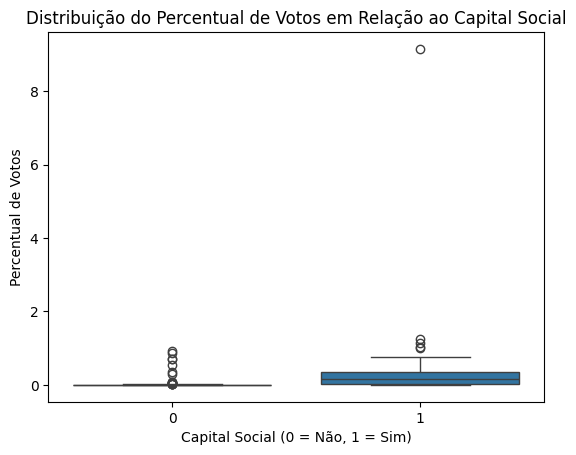

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo com variável 'Capital_Social' e 'Percentual_Votos'
sns.boxplot(x='Capital_Social', y='Percentual_Votos', data=df_2018)
plt.title('Distribuição do Percentual de Votos em Relação ao Capital Social')
plt.xlabel('Capital Social (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Votos')
plt.show()

Usando o gráfico boxplot para verificar como o percentual de votos varia com base na presença ou ausência do capital social (ou quaisquer das outras variáveis dummy que irremos utilizar).
Temos dois boxplot, considerando que estamos trabalhando com variáveis dummy. Vemos pontos fora dos "bigodes" (outliers). Eles representam valores que são significativamente mais altos ou mais baixos do que a maioria dos dados. A mediana (linha dentro da caixa) está mais alta para o grupo com Capital_Social = 1, isso indica que, em média, os candidatos com capital social tendem a ter um percentual de votos mais alto. Outra coisa, a caixa para Capital_Social = 1 (com capital social) está mais alta em comparação ao de Capital_Social = 0, isso sugere que os candidatos com capital social tendem a ter um percentual de votos maior.

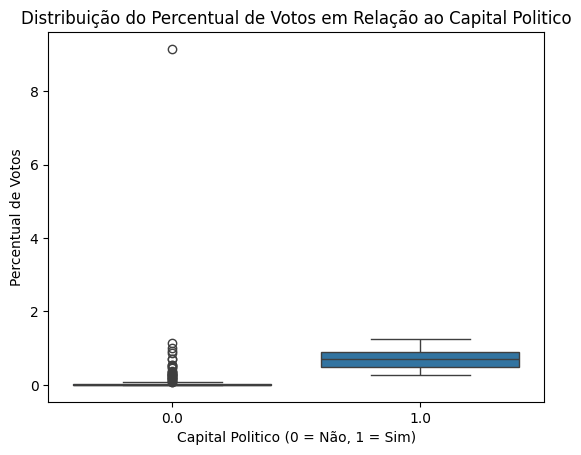

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo com variável 'Capital_Politico' e 'Percentual_Votos'
sns.boxplot(x='Capital_Politico', y='Percentual_Votos', data=df_2018)
plt.title('Distribuição do Percentual de Votos em Relação ao Capital Politico')
plt.xlabel('Capital Politico (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Votos')
plt.show()

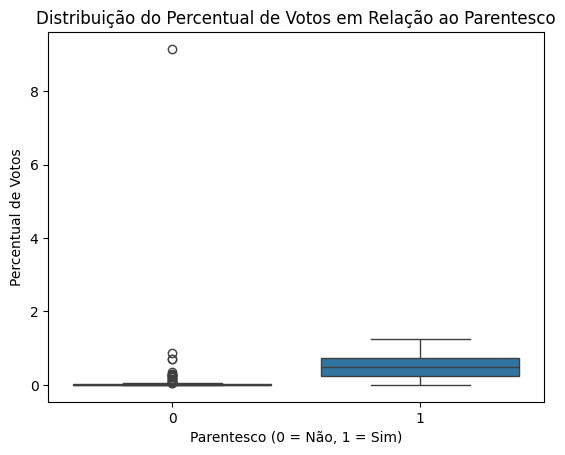

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo com variável 'Parentesco' e 'Percentual_Votos'
sns.boxplot(x='Parentesco', y='Percentual_Votos', data=df_2018)
plt.title('Distribuição do Percentual de Votos em Relação ao Parentesco')
plt.xlabel('Parentesco (0 = Não, 1 = Sim)')
plt.ylabel('Percentual de Votos')
plt.show()

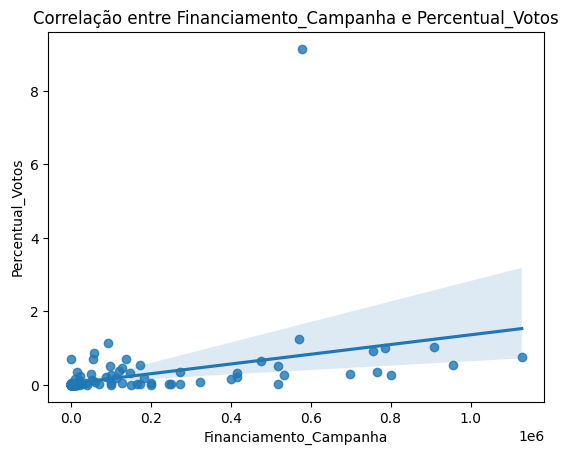

In [10]:
sns.regplot(x='Financiamento_Campanha', y='Percentual_Votos', data=variaveis)
plt.title('Correlação entre Financiamento_Campanha e Percentual_Votos')
plt.show()

Em se tratando de variáveis contínua utilizamos o gráfico de dispersão para melhor visualização da correlação entre elas. Confirma-se a direção positiva e a magnitude, conforme disposição dos dados (bolinhas). Lá em cima um outilier! Atentear a disposição dos pontinhos: quanto menor for a dispersão dos pontos, maior será a correlação entre os dados.

Resgatando as hipóteses para iniciar o processo de teste:

H1 - o capital social aumenta o percentual de votos; 
H2 – o capital político aumenta o percentual de votos; 
H3 – o parentesco aumenta o percentual de votos; 
H4 – o financiamento de campanha aumenta o percentual de votos. 
Para tanto, utilizaremos a Regressão Multilinear, considerando que permite modelar o efeito simultâneo de várias variáveis independentes sobre uma variável dependente contínua, que no nosso caso é o Percentual de Votos.
Em um modelo de regressão podemos assumir que quanto maior o valor de R2, maior o poder de explicação da equação de regressão e, portanto, melhor a previsão da variável dependente (HAIR JUNIOR et al, 2009). R-quadrado, indica o quanto do percentual de votos pode ser explicado pelo conjunto de variáveis independentes.
Já o p-valores, indicam se o efeito da variável é estatisticamente significativo. Por meio dele podemos testar as nossas hipóteses. Se o p-valor for menor que 0,05, a variável tem um efeito significativo sobre o percentual de votos.

Vamos convidar a biblioteca statsmodels, pois ela é projetada para realizar modelagem estatística e testes econométrico.

In [11]:
import statsmodels.formula.api as smf
modelo = smf.ols('Percentual_Votos ~ Capital_Social + Parentesco + Financiamento_Campanha + Capital_Politico', data=variaveis)

resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:       Percentual_Votos   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     7.873
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           7.69e-06
Time:                        15:16:52   Log-Likelihood:                -175.07
No. Observations:                 173   AIC:                             360.1
Df Residuals:                     168   BIC:                             375.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

Resultados do modelo:

Financiamento_Campanha: valor-p = 0.000 Capital_Social: valor-p > 0.05 (não significativo) Capital_Politico: valor-p > 0.05 (não significativo) Parentesco: valor-p > 0.05 (não significativo) Respostas:

Hipótese sobre Financiamento_Campanha:

Rejeitamos a hipótese nula (H0) para Financiamento_Campanha, pois o valor-p é menor que o nível de significância (0.05). 
Conclusão: Há evidências estatísticas suficientes para afirmar que o financiamento de campanha tem um efeito significativo sobre o percentual de votos. 

Em relação as outras hipóteses: Não rejeitamos a hipótese nula (H0) para Capital_Social, Capital_Politico e Parentesco, pois os valores-p são maiores que o nível de significância (0.05). Conclusão: Não há evidências estatísticas suficientes para afirmar que essas variáveis têm um efeito significativo sobre o percentual de votos, quando consideradas em conjunto no modelo. 

Resumindo: O modelo de regressão indica que o financiamento de campanha é um fator importante para o sucesso eleitoral, enquanto as outras variáveis analisadas (Capital_Social, Capital_Politico e Parentesco) não demonstraram ter um efeito significativo quando consideradas em conjunto no modelo.